## Jordão Fernandes de Andrade
Date: 23/02/2021 \
Project: Credit Default dataset \
Description: Final Project from Udemy's course "Formação Cientista de Dados com R e Python", by Fernando Almeida. https://www.udemy.com/course/cientista-de-dados/

In [82]:
# Pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split                                 # dividir dados entre treino e teste
from sklearn.preprocessing import LabelEncoder, OneHotEncoder                        # para label encoding
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay # criar matriz de confusão
from yellowbrick.classifier import ConfusionMatrix                                   # criar matriz de confusão gráfica

# 1. Naive Bayes
from sklearn.naive_bayes import GaussianNB                                           # naive bayes

# 2. Decision Tree
from sklearn.tree import DecisionTreeClassifier                                      # Algoritmo classificador de árvore de decisão
import graphviz                                                                      # Decision Tree visualization
from sklearn.tree import export_graphviz                                             # Decision Tree visualization

# 3. Attribute Selection
from sklearn.svm import SVC                                                          # para usar máquina de vetor de suporte
from sklearn.ensemble import ExtraTreesClassifier

# 4. Random Forest
from sklearn.ensemble import RandomForestClassifier                                  # Algoritmo de Floresta Aleatória

# 5. Neural Network
from keras import callbacks                                                          # Choose optimal number of epochs to train a neural network in Keras
from keras.models import Sequential                                                  # keras: deep learning packages
from keras.layers import Dense, Dropout                                              # Add Dense Layers in Network
from sklearn.compose import make_column_transformer                                  # Used with One Hot Encoder

In [2]:
# Load data
data = pd.read_csv('dados/credit.csv')
data.head()

,IDCREDITO,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
0,2,48,2,1,5951,2,3.0,2,1,3,2.0,22,3,1.0,1,4,1,0,0,0
1,3,12,1,2,2096,2,4.0,2,4,3,3.0,49,3,1.0,1,3,2,0,0,1
2,4,42,2,3,7882,2,4.0,2,4,4,4.0,45,3,2.0,1,4,2,0,0,1
3,5,24,3,4,4870,2,3.0,3,4,3,4.0,53,3,2.0,2,4,2,0,0,0
4,6,36,2,2,9055,1,3.0,2,4,3,4.0,35,3,2.0,1,3,2,1,0,1


In [3]:
data = data.drop(['IDCREDITO'], axis=1)
data.head()

,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
0,48,2,1,5951,2,3.0,2,1,3,2.0,22,3,1.0,1,4,1,0,0,0
1,12,1,2,2096,2,4.0,2,4,3,3.0,49,3,1.0,1,3,2,0,0,1
2,42,2,3,7882,2,4.0,2,4,4,4.0,45,3,2.0,1,4,2,0,0,1
3,24,3,4,4870,2,3.0,3,4,3,4.0,53,3,2.0,2,4,2,0,0,0
4,36,2,2,9055,1,3.0,2,4,3,4.0,35,3,2.0,1,3,2,1,0,1


# Machine Learning Classification Models

1. Naive Bayes
2. Decision Tree
3. Attribute Selection
4. Random Forest
5. Neural Network

## 1. Naive Bayes

#### Divide base em variáveis independentes (X) e dependente (Y)

In [4]:
# divide variáveis independentes (previsores - X) e variável dependente (classe - Y)
X = data.loc[:,~data.columns.str.contains('Status')].values # ~data.columns.str.contains('Status') seleciona todas as colunas que NÃO contêm 'Status' no nome
Y = data.loc[:,data.columns.str.contains('Status')].values  # data.columns.str.contains('Status') seleciona todas as colunas que CONTÊM 'Status' no nome
#X.shape
len(X[0]) # lenght das colunas de X

18

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size = 0.3,
                                                    random_state = 0)

#### Treinamento do Modelo

In [6]:
# Criação e treinamento do modelo (geração da tabela de probabilidades)
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, Y_train)

C:\Users\jorda\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [7]:
# Previsões utilizando os registros de teste
previsoes = naive_bayes.predict(X_test)

#### Matriz de Confusão

In [8]:
confusao = confusion_matrix(Y_test, previsoes)
confusao

array([[ 41,  34],
       [ 40, 185]], dtype=int64)

#### Taxa de Acerto

In [9]:
taxa_acerto = accuracy_score(Y_test, previsoes)
taxa_acerto

0.7533333333333333

In [10]:
Naive_Bayes = taxa_acerto

#### Visualização da Matriz de Confusão

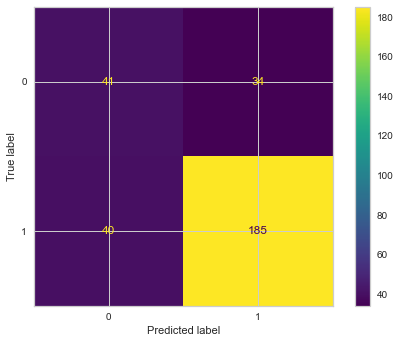

In [11]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, previsoes))
disp.plot()

## 2. Decision Tree

#### Treinamento do Modelo

In [12]:
# Criação e treinamento do modelo
arvore = DecisionTreeClassifier()
arvore.fit(X_train, Y_train)

DecisionTreeClassifier()

#### Visualizando Árvore de Decisão

In [13]:
# Exportação da árvore de decisão para o formato .dot, para posterior visualização
export_graphviz(arvore, out_file = 'dados/tree.dot')

# Para visualizar, colar código do arquivo .dot http://www.webgraphviz.com/

#### Matriz de Confusão

In [14]:
# Obtenção das previsões
previsoes = arvore.predict(X_test)
# matriz de confusão
confusao = confusion_matrix(Y_test, previsoes)
confusao

array([[ 30,  45],
       [ 59, 166]], dtype=int64)

#### Taxa de Acerto

In [15]:
taxa_acerto = accuracy_score(Y_test, previsoes)
taxa_acerto

0.6533333333333333

In [16]:
Decision_Tree = taxa_acerto

#### Visualização da Matriz de Confusão

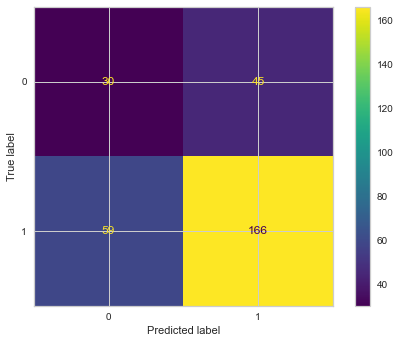

In [17]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, previsoes))
disp.plot()

## 3. Attribute Selection

#### Treinamento do Modelo

In [18]:
# Criação do modelo, treinamento, obtenção das previsões e da taxa de acerto
svm = SVC()
svm.fit(X_train, Y_train)

C:\Users\jorda\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [19]:
#previsoes
previsoes = svm.predict(X_test)
#previsoes

#### Matriz de Confusão

In [20]:
# matriz de confusão
confusao = confusion_matrix(Y_test, previsoes)
confusao

array([[  4,  71],
       [  4, 221]], dtype=int64)

#### Taxa de Acerto

In [21]:
taxa_acerto = accuracy_score(Y_test, previsoes)
taxa_acerto

0.75

In [22]:
Attribute_Selection = taxa_acerto

#### Visualização da Matriz de Confusão

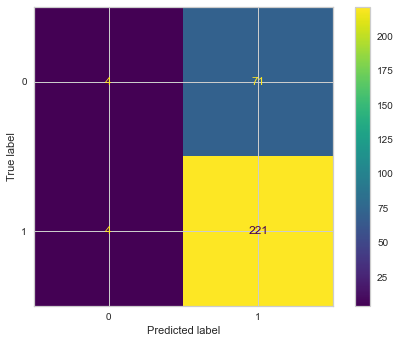

In [23]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, previsoes))
disp.plot()

#### Seleção de Atributos - Extrair Características mais importantes para o modelo

In [24]:
# Utilização do algoritmo ExtraTreesClassifier para extrair as características mais importantes
forest = ExtraTreesClassifier()
forest.fit(X_train, Y_train)
atributos = forest.feature_importances_
atributos

<ipython-input-24-446caf5c3bc0>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, Y_train)


array([0.10367857, 0.07534789, 0.07050399, 0.10015731, 0.06221333,
       0.06626889, 0.05600975, 0.04546409, 0.02934494, 0.06249648,
       0.09676731, 0.03542555, 0.03825147, 0.03704371, 0.05156061,
       0.02629327, 0.03450465, 0.00866817])

#### Nova base apenas com atributos mais importantes

In [25]:
# Criação de nova base de dados utilizando somente os atributos mais importantes
X_train2 = X_train[:,[0,1,2,3,4,11]]
X_test2 = X_test[:,[0,1,2,3,4,11]]

#### Novo Modelo com Atributos mais importantes

In [26]:
# Criar de outro modelo com a base de dados reduzida, treinamento e obtençaão das previsões e taxa de acerto
svm2 = SVC()
svm2.fit(X_train2, Y_train)
previsoes2 = svm2.predict(X_test2)

C:\Users\jorda\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


#### Taxa de Acerto Novo Modelo

In [27]:
taxa_acerto = accuracy_score(Y_test, previsoes2)
taxa_acerto
# Mesmo resultado que modelo com todos atributos. Portanto, diferença não significativa.

0.7466666666666667

## 4. Random Forest

#### Treinamento do Modelo

In [28]:
# Criação do modelo, treinamento, obtenção das previsões e da taxa de acerto
floresta = RandomForestClassifier(n_estimators = 200)  # é o número de árvores criadas
floresta.fit(X_train, Y_train)

<ipython-input-28-e060bad758a1>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  floresta.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=200)

In [29]:
previsoes = floresta.predict(X_test)
confusao = confusion_matrix(Y_test, previsoes)
confusao

array([[ 28,  47],
       [ 17, 208]], dtype=int64)

In [30]:
taxa_acerto = accuracy_score(Y_test, previsoes)
taxa_acerto
Random_Forest = taxa_acerto

#### Visualização da Matriz de Confusão

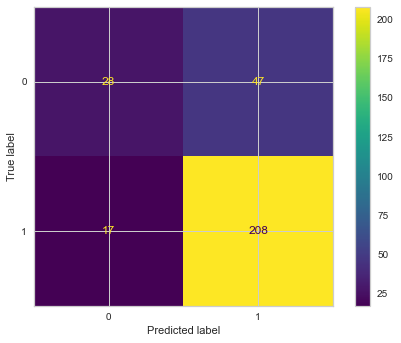

In [31]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, previsoes))
disp.plot()

## 5. Neural Network

#### Transformação das Variáveis em dummies para adequação à rede neural

In [32]:
# Nome das colunas
#list(dataset.columns)
column_names = data.columns[1:18] # EXCLUI COLUNA IDCREDITO e STATUS
column_names

Index(['HistoricoCredito', 'Proposito', 'Valor', 'Investimentos', 'Emprego',
       'TempoParcelamento', 'EstadoCivil', 'FiadorTerceiros',
       'ResidenciaDesde', 'Idade', 'OutrosFinanciamentos', 'Habitacao',
       'EmprestimoExistente', 'Profissao', 'Dependentes', 'SocioEmpresa',
       'Estrangeiro'],
      dtype='object')

In [33]:
data = pd.get_dummies(data, columns=column_names, drop_first=True)
data.head()

,Duracao,Status,HistoricoCredito_1,HistoricoCredito_2,HistoricoCredito_3,HistoricoCredito_4,HistoricoCredito_5,Proposito_2,Proposito_3,Proposito_4,...,EmprestimoExistente_2,EmprestimoExistente_3,EmprestimoExistente_4,Profissao_2,Profissao_3,Profissao_4,Profissao_999,Dependentes_2,SocioEmpresa_1,Estrangeiro_1
0,48,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,12,1,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,42,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
3,24,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
4,36,1,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0


In [34]:
# divide variáveis independentes (previsores - X) e variável dependente (classe - Y)
X = data.loc[:,~data.columns.str.contains('Status')].values
Y = data.loc[:,data.columns.str.contains('Status')].values
#X.shape
len(X[0]) # lenght das colunas de X

1021

In [35]:
Y.shape

(1000, 1)

**Transforma variável dependente (class) em dummies**

In [36]:
# one hot encoder
# deve adicionar 19 colunas, pois a classe tem 19 possibilidades de entrada
onehotencoder = make_column_transformer((OneHotEncoder(categories='auto', sparse=False), [0]), remainder="passthrough")
Y = onehotencoder.fit_transform(Y)
Y.shape

(1000, 2)

#### Divide Base entre Treino e Teste

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print(len(X_train),len(X_test),len(Y_train),len(Y_test)) # verificar a divisão

700 300 700 300


#### Criação da Estrutural de Rede

In [38]:
modelo = Sequential()
modelo.add(Dense(units = 10, activation = 'sigmoid', input_dim = len(X[0])))
modelo.add(Dropout(0.1)) # transforma em 0 uma porcentagem dos links entre camadas, a fim de evitar overfitting.
modelo.add(Dense(units = 10, activation = 'sigmoid'))
modelo.add(Dropout(0.1))
modelo.add(Dense(units = 10, activation = 'sigmoid'))
modelo.add(Dropout(0.1))

modelo.add(Dense(units = 2, activation = 'softmax'))

modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                10220     
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 2

#### Compilando o Modelo

In [39]:
# Compilando o modelo
# Configuração dos parâmetros da rede neural (adam = algoritmo para otimizar os pesos das variáveis independentes; categorical_crossentropy = forma de cálculo do erro)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])  # corresponde à taxa de acerto

#### Treinando o Modelo

In [40]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
                                        mode ="auto", patience = 10,  
                                        restore_best_weights = True)

historico = modelo.fit(X_train, Y_train, epochs = 1000,
          validation_data=(X_test, Y_test),
          callbacks =[earlystopping])

Epoch 1/1000
22/22 [==============================] - 2s 59ms/step - loss: 0.8342 - accuracy: 0.3709 - val_loss: 0.7073 - val_accuracy: 0.2500
Epoch 2/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5672 - val_loss: 0.6177 - val_accuracy: 0.7500
Epoch 3/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.6693 - accuracy: 0.6136 - val_loss: 0.5895 - val_accuracy: 0.7500
Epoch 4/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.6533 - accuracy: 0.6379 - val_loss: 0.5801 - val_accuracy: 0.7500
Epoch 5/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.6310 - accuracy: 0.6701 - val_loss: 0.5742 - val_accuracy: 0.7500
Epoch 6/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.6487 - accuracy: 0.6635 - val_loss: 0.5722 - val_accuracy: 0.7500
Epoch 7/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.6722 - accuracy: 0.6218 - val_loss: 0.5717 - val_accuracy: 0.7500
Epoch

In [41]:
previsoes = modelo.predict(X_test)
previsoes = (previsoes > 0.5)

In [42]:
previsoes = [np.argmax(t) for t in previsoes]
Y_test = [np.argmax(t) for t in Y_test]

In [43]:
confusao = confusion_matrix(Y_test, previsoes)
confusao

array([[ 35,  40],
       [ 21, 204]], dtype=int64)

#### Taxa de Acerto

In [44]:
#taxa acerto
taxa_acerto = accuracy_score(Y_test, previsoes)
taxa_acerto

0.7966666666666666

In [45]:
Neural_Network = taxa_acerto

#### Visualizar Matriz de Confusão

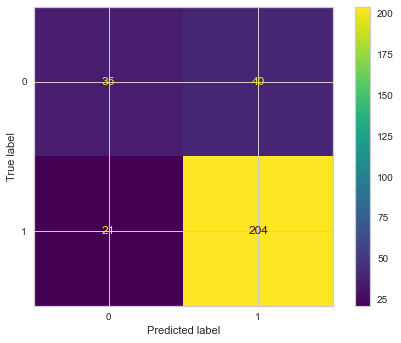

In [46]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, previsoes))
disp.plot() 

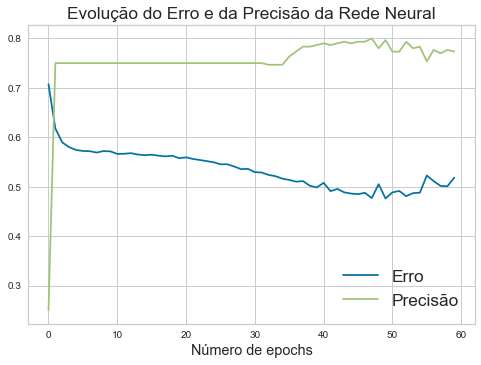

In [76]:
fig, ax = plt.subplots()
ax.plot(historico.history['val_loss'], label='Erro')
ax.plot(historico.history['val_accuracy'], label='Precisão')
plt.title('Evolução do Erro e da Precisão da Rede Neural', fontsize='x-large')
plt.xlabel('Número de epochs', fontsize='large')

legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large')

plt.show()

## Avaliação dos Modelos

In [79]:
Evaliation = pd.DataFrame(data={'Naive Bayes':[Naive_Bayes],
                          'Decision Tree':[Decision_Tree],
                          'Attribute Selection':[Attribute_Selection],
                          'Random Forest':[Random_Forest],
                          'Neural Network':[Neural_Network]})
Evaliation

,Naive Bayes,Decision Tree,Attribute Selection,Random Forest,Neural Network
0,0.753333,0.653333,0.75,0.786667,0.796667


In [81]:
Evaliation.columns[np.argmax(Evaliation)]

'Neural Network'